# Introduction to deap
### Iván andrés trujillo &  Daniel tinjacá

The code implementation of GA algorithm is this notebook is completely constructed as summary of the reference book:
 **algortimos genéticos en python** 

# Learning by doing...


## Benchmark functions?


In [177]:
import random
import math
import numpy as np
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import matplotlib.pyplot as plt

# Creamos los objetos para definir el problema y el tipo de individuo
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

# Gene generation
toolbox.register("attr_uniform", random.uniform, -100, 100)

# Individuals and population
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_uniform,2)
toolbox.register("population", tools.initRepeat , list , toolbox.individual, 30)

individuo = toolbox.individual()
poblacion = toolbox.population()

/home/ivan/.local/lib/python3.10/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


## creator.create()


# Important paramters
CXPB-> probability of crossovver
MUTPB-> probability of mutation
NGEN-> number of generations


```python
def main():
    random.seed(1)
    CXPB, MUTPB, NGEN = 0.5, 0.2, 20
    pop  = toolbox.population()  # create the initial population
    hof  = tools.HallOfFame(1) # keep the better individual in each gestneration
    stats = tools.Statistics(lambda ind: ind.fitness.values) #to keep statistics about population in each population
    # register statiticals functions of numpy library
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()
    pop, logbook  = algorithms.eaSimple(pop, toolbox, cxpb = CXPB, mutpb = MUTPB, 
                                        ngen = NGEN, stats = stats,
                                        hallofffame = hof , verbose = True)
    return hof, logbook
```
*deap* have several implementations GA,  _eaSimple_ is our first and basic algorithm; the parameters are:
*population, toolbox,  cxpb, mutpb, ngen, stats halloffame, verboose* and will return us final population and logbook( evolution registry).

Execution of the algorithm.

```python
if __name__ == "__main__":
    best, log = main()
    print("The better fitness" \%best[0].fitness.values)
    print("solution" \%best[0])
```
what we can see? (gen) the number of generatios, number of evaluations ( number of  individuals that has been evaluated or has been modified by the operators, remember that are probabilistics operators.)(nevals), mean performance of the population (avg), standard deviation (std) .....

GA is stochastic therefore  we need execute it several times:

changes:
* Increase the population until there is not significant improvements.
* Increase the number of generations until the algorithm show convergence.
* Change the probability of crossover and mutation.


tools.Logbook() store the information as a dictionaries.


## plotting the covergence of GA
```python
def plot(log):
    gen = log.select("gen")
    fit_mins = log.selec("min")
    fit_maxs = log.select("max")
    fit_avg = log.select("avg")
    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_avg, "--k")
    ax1.fill_between(gen, fit_mins, fit_maxs,
                     where=fit_maxs >= fit_mins, facecolor ='g', alpha = 0.2)
    ax1.set_xlabel("Generation")
    ax1.set_ylabl("Fitness")
    ax1.set_ylim([-10 ,160])
    ax1.legend(["Min", "Max", "Avg"], loc="lower center")
    plt.grid(True)
```
    
### How implemented it ?

```python
if __name__ == "__main__":
    random.seed(1)
    betters = list()
    for _ in range(20):
        best = main()
        betters.append(best[0].fitness.values)
mean = np.mean(betters)
best = max(betters)
print(mean, best)
plot_evolution(log)
```  

What should be show the graph ?



# Solve Quadratic function


\begin{equation}
f(x) = ax^{2} + b^{x} + c
\end{equation}

In a analytical way it  is enough $f'(x^{*}) = 0$.

Therefore, $f'(x) = 2ax + b = 0$ getting x, we have $x^{*} = \frac{-b}{2a}$ the exactly solution.

## Why gradient descent work?


## Partial derivate 
Is a special case of directional derivattive.


This need additional information(derivatives) and its performance is 

348.0


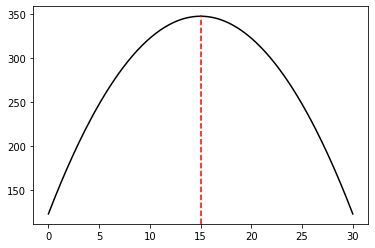

In [178]:
a,b,c = -1, 30, 123

domL,domU = 0,30

def optimal(a,b):
  return -b/(2*a)

def fitness(x,a,b,c):
  return a*(x**2) + b*x + c
y = [fitness(x,a,b,c) for x in np.linspace(domL, domU , 200)]
plt.plot(np.linspace(domL, domU, 200), y , color='black')
plt.axvline(x = optimal(a,b), color = 'red', linestyle='--', ymax =0.96)
print(fitness(optimal(a,b),a,b,c))
plt.savefig('quadratic.eps', format='eps')

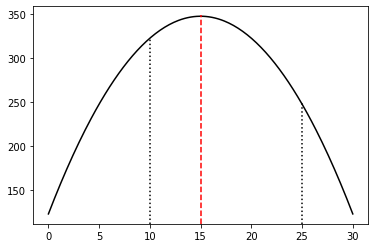

In [179]:
# Candidate ? 
# Chromosome representation is binary 
plt.plot(np.linspace(domL, domU, 200), y, color='black')
plt.axvline(x = optimal(a,b), color = 'red', linestyle='--', ymax =0.96)
plt.axvline(x = 10, color = 'black', linestyle='dotted', ymax =0.85)
plt.axvline(x = 25, color = 'black', linestyle='dotted', ymax =0.555)
plt.savefig('quadraticTWOPOINTS.eps', format='eps')

# Swap information of two candidates
```python3
[1,0]
[2,5]
------
[1,5]--> Optimal solution
[2,0]
-------
```

In [180]:
import numpy as np
import matplotlib.pyplot as plt

def quadratic(a,b,c,x ):
  return a*x**2 + b*x + c

# Derivative of the function
def Dxquadratic(a,b,x):
  return 2*a*x + b

def GDS_Quadratic( x0, problem =1, learning_rate=0.0001, iterations_max=99900, error_max = 0.001, a=a,b=b):
  gradient = Dxquadratic   # We defined previously
  xi = x0
  iters = 0
  error = 100
  while (iters < iterations_max) and (error > error_max):
    if problem ==1: 
        xj = xi - learning_rate *(-1)*gradient(a,b, xi)  # Maximization
    else:
        xj = xi - learning_rate * gradient(a,b, xi)  #Minimization
    error = abs(xi-xj)
    xi = xj
    iters += 1
  return xj,iters
GDS_Quadratic(1, learning_rate=0.1) 

(14.996365392199024, 37)

In [181]:
# deap optimization
import random 
import math 
import numpy as np
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import matplotlib.pyplot as plt

# individuals and problem
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# The objective function or fitness function will be quadratic()
toolbox = base.Toolbox()
#Genes 
toolbox.register("rand09", np.random.randint, 0, 100)  # this line 
# individual definition
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.rand09, 3)
# Population
toolbox.register("Population", tools.initRepeat, list , toolbox.individual, 100)


def listTox(array):
    total = 0
    for i in range(len(array)):
        total = total + (array[i] / (10**i))
    return total

def quadratic(x):
    x = listTox(x)
    a,b,c = -1,30,123  # Parameters to assess 
    res = a*(x**2) + b*x+ c
    return res, 


# Genetic operations
toolbox.register("evaluate", quadratic)  # The quadratic function
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=5 , indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize = 3)


def plot(log):
    gen = log.select("gen")
    fit_mins = log.selec("min")
    fit_maxs = log.select("max")
    fit_avg = log.select("avg")
    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_avg, "--k")
    ax1.fill_between(gen, fit_mins, fit_maxs,
                     where=fit_maxs >= fit_mins, facecolor ='g', alpha = 0.2)
    ax1.set_xlabel("Generation")
    ax1.set_ylabl("Fitness")
    ax1.set_ylim([-10 ,160])
    ax1.legend(["Min", "Max", "Avg"], loc="lower center")
    plt.grid(True)


def main():
    random.seed(1)
    CXPB, MUTPB, NGEN = 0.5, 0.2, 20
    pop  = toolbox.Population()  # create the initial population
    hof  = tools.HallOfFame(1) # keep the better individual in each gestneration
    stats = tools.Statistics(lambda ind: ind.fitness.values) #to keep statistics about population in each population
    # register statiticals functions of numpy library
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()
    pop, logbook  = algorithms.eaSimple(pop, toolbox, cxpb = CXPB, mutpb = MUTPB, 
                                        ngen = NGEN, stats = stats,
                                        halloffame = hof , verbose = True)
    return hof, logbook


if __name__ == "__main__":
    best, log = main()
    print("The better fitness" ,best[0].fitness.values)
    print("solution" , listTox(best[0]))

gen	nevals	avg     	std    	min    	max   
0  	100   	-2210.62	2565.53	-7865.8	347.87
1  	61    	-416.999	1197.49	-5251.53	347.988
2  	66    	220.476 	270.608	-1257.6 	347.997
3  	68    	338.083 	19.541 	232.222 	348    
4  	67    	345.804 	7.31673	282.542 	348    
5  	59    	346.451 	12.3135	224.188 	348    
6  	61    	347.339 	2.405  	331.434 	348    
7  	53    	346.902 	7.34493	279.183 	348    
8  	54    	347.418 	3.93028	318.567 	348    
9  	58    	347.827 	1.7137 	330.776 	348    
10 	58    	347.568 	4.17048	306.09  	348    
11 	54    	347.903 	0.956095	338.39  	348    
12 	60    	347.607 	3.33844 	314.759 	348    
13 	63    	347.996 	0.0379296	347.619 	348    
14 	62    	347.948 	0.281224 	345.989 	348    
15 	54    	347.325 	5.04443  	301.559 	348    
16 	69    	347.989 	0.0989015	347.008 	348    
17 	66    	346.269 	13.7895  	214.855 	348    
18 	66    	347.872 	0.918838 	339.195 	348    
19 	67    	347.333 	6.24632  	285.299 	348    
20 	50    	347.404 	5.85331  	289.168 	348 

# Gradient descent or Genetic?

The gradient descent could be stucked in a local point, while genetic have some mechanism to reach  out.

## TSP modelling


Hereforth, $n$ the number of cities, $d_{ij}$ the distance among the city $j$ and $i$. $x_{ij}$ is a binary var,will be $1$ if the path from $i$ to $j$ has been consider, and $0$ in otherwise.

\begin{equation}
\min \sum_{i=1}^{n} \sum_{j=1}^{n} d_{ij} x_{ij} \\
S.t: \\
\sum_{j=1}^{n} x_{ij} = 1, \forall i  \\
\sum_{i=1}^{n} x_{ij} = 1, \forall j
\end{equation}




## Ciclo hamiltoniano 

TSP requiere find the namiltonian cycle of minimun disticance.


# Complexity of TSP



## Applications of TSP
transport, logistic and routing of autonomos vehicles.



# The posible solution 
```python
[A,B,C,D] 
```
therefore the distance will be; $d(A,B) + d(B,C) + d(C,D) + d(D,A)$


The data was extracted of here; https://simplemaps.com/data/co-cities

In [182]:
import pandas as pd
data = pd.read_csv("cities.csv")
data = data[data['capital']=='admin'].sample(30, random_state=4).reset_index(drop=True)
capitals = data['city'].unique()
cities_dict = {}
for index in data.index:
    cities_dict[data.loc[index,'city']] = [data.loc[index, 'lat'] , data.loc[index, 'lng']]

In [183]:
# Genetic TSP implementation:
import random
import json
import numpy as np
import matplotlib.pyplot as plt
from deap import algorithms
from deap import creator
from deap import base
from deap import tools

In [192]:
# Fitness function and another neccesary funtcions
def distanceF(cityA, cityB):
    return ((cityA[0] - cityB[0])**2  + (cityA[1] - cityB[1])**2)**(1/2)

# Evaluate a path
def eval_tsp(individual):
    index_test = individual
    path_test = capitals[index_test]
    route = distanceF(cities_dict[path_test[0]],  cities_dict[path_test[-1]]) # The first and the last city to complete
    for i in range(len(path_test)-1): 
        route += distanceF(cities_dict[path_test[i]], cities_dict[path_test[i+1]])
    return route, # It is important return a tuple


IND_SIZE = len(capitals)  # the number of cities to find the closest path

# Creating problem and kind of individual:
creator.create("FitnessMin", base.Fitness, weights = (-1.0,))
creator.create("Individual", list , fitness=creator.FitnessMin)
## Toolbox 
## create the tours or paths..
#the strategy is store the list in a list and create indices as individuals or tours.
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(IND_SIZE), IND_SIZE)   # draw k samples without replacement including
                                                                        # zero  and excluding N
#Given that "indices" returns us a complete individual dont need uses init.Repeat otherwise, init.Iterate
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
# two paratermers accep initIterate ( container(Individual) and Func(indices a iterable function))
# Create the initial population
toolbox.register("population", tools.initRepeat, list, toolbox.individual,100)

#Genetic Operators (preserve the names)
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=10)
toolbox.register("evaluate", eval_tsp)

# The genetic algorithm 
# MuPlusLambda 
# This algorithm is more elitist  and requiere more computations.
# the main idea is that here paretns ( mu) and child(lambda) compite between them
# The paremeters are initial population, toolbox, mu, lambda, cxpb ( probability of crossover)
# mutpb (probability of mutation), ngen (number of generations), stats ( registry of functions), halloffame


def main():
    random.seed(101)
    CXPB, MUTPB, NGEN = 0.7, 0.3, 400
    pop = toolbox.population()
    MU, LAMBDA = len(pop), len(pop)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()
    pop, logbook = algorithms.eaMuPlusLambda(pop,toolbox, MU, LAMBDA, CXPB, MUTPB, NGEN,
                                            stats = stats, halloffame=hof)
    return pop, logbook

if __name__ == "__main__":
    best, log  = main()
    print("\n",'--'*50)
    print(f"The fitness {best[0].fitness.values} and he better path is : \n",)
    print(capitals[best[0]])
    print("--"*50)

gen	nevals	avg    	std    	min    	max    
0  	100   	165.594	13.1026	128.615	192.141
1  	100   	145.144	8.05841	128.615	159.045
2  	100   	132.164	5.59197	123.466	148.351
3  	100   	125.296	2.73163	120.59 	131.532
4  	100   	120.949	2.27384	111.16 	124.847
5  	100   	117.27 	2.62592	111.16 	121.83 
6  	100   	113.785	1.83163	111.16 	117.691
7  	100   	111.159	1.54034	105.744	114.264
8  	100   	108.631	2.29853	104.232	111.16 
9  	100   	105.051	1.36756	101.98 	109.772
10 	100   	102.339	1.21234	99.7179	104.654
11 	100   	100.149	1.59885	94.5405	102.518
12 	100   	96.9279	2.60353	91.2171	100.456
13 	100   	93.2507	1.83137	88.9455	97.9449
14 	100   	91.0336	0.743945	88.9455	92.7095
15 	100   	89.9082	1.04005 	88.9455	91.2171
16 	100   	88.942 	0.0151346	88.8761	88.9455
17 	100   	88.9053	0.073644 	88.5831	88.9455
18 	100   	88.7737	0.186913 	88.2415	88.9455
19 	100   	88.4113	0.256235 	87.879 	88.8761
20 	100   	87.9765	0.236644 	87.3939	88.5136
21 	100   	87.6898	0.236622 	87.3939	87.87

185	100   	71.0614	0          	71.0614	71.0614
186	100   	71.0614	0          	71.0614	71.0614
187	100   	71.0614	0          	71.0614	71.0614
188	100   	71.061 	0.00231997 	71.0448	71.0614
189	100   	71.06  	0.00449565 	71.0448	71.0614
190	100   	71.0529	0.00828394 	71.0448	71.0614
191	100   	71.0448	1.42109e-14	71.0448	71.0448
192	100   	71.0448	1.42109e-14	71.0448	71.0448
193	100   	70.8438	0.639071   	68.8117	71.0448
194	100   	70.1069	1.10216    	68.8117	71.0448
195	100   	68.8051	0.0198128  	68.7457	68.8117
196	100   	68.7787	0.0330214  	68.7457	68.8117
197	100   	68.7476	0.0112661  	68.7457	68.8117
198	100   	68.7457	0          	68.7457	68.7457
199	100   	68.7457	0          	68.7457	68.7457
200	100   	68.7149	0.10417    	68.3617	68.7457
201	100   	68.5268	0.190097   	68.3617	68.7457
202	100   	68.3617	0          	68.3617	68.3617
203	100   	68.3617	0          	68.3617	68.3617
204	100   	68.3617	0          	68.3617	68.3617
205	100   	68.3617	0          	68.3617	68.3617
206	100   	68

375	100   	66.0248	1.42109e-14	66.0248	66.0248
376	100   	66.0248	1.42109e-14	66.0248	66.0248
377	100   	66.0248	1.42109e-14	66.0248	66.0248
378	100   	66.0248	1.42109e-14	66.0248	66.0248
379	100   	66.0248	1.42109e-14	66.0248	66.0248
380	100   	66.0248	1.42109e-14	66.0248	66.0248
381	100   	66.0248	1.42109e-14	66.0248	66.0248
382	100   	66.0248	1.42109e-14	66.0248	66.0248
383	100   	66.0248	1.42109e-14	66.0248	66.0248
384	100   	66.0248	1.42109e-14	66.0248	66.0248
385	100   	66.0248	1.42109e-14	66.0248	66.0248
386	100   	66.0248	1.42109e-14	66.0248	66.0248
387	100   	66.0248	1.42109e-14	66.0248	66.0248
388	100   	66.0248	1.42109e-14	66.0248	66.0248
389	100   	66.0248	1.42109e-14	66.0248	66.0248
390	100   	66.0248	1.42109e-14	66.0248	66.0248
391	100   	66.0248	1.42109e-14	66.0248	66.0248
392	100   	66.0248	1.42109e-14	66.0248	66.0248
393	100   	66.0248	1.42109e-14	66.0248	66.0248
394	100   	66.0248	1.42109e-14	66.0248	66.0248
395	100   	66.0248	1.42109e-14	66.0248	66.0248
396	100   	66

# The real optimal solution

In [185]:
import itertools
#paths = list(itertools.permutations(capitals))
#index, index_aux = 0,0
def eval_tsp_brute(paths):
    array = []
    for path in paths:
        route = distanceF(cities_dict[path[0]],cities_dict[path[-1]])
        for i in range(len(path)-1):
            route = route  +  distanceF(cities_dict[path[i]],cities_dict[path[i+1]])
        array.append([route, path])
    array.sort(reverse=False, key=lambda x:x[0])
    return array[0]

In [186]:
#%%time
#eval_tsp_brute(paths)

In [187]:
import folium
map = folium.Map(location=[4.570868, -74.297333], zoom_start=6)
points = [cities_dict[city] for city in list(capitals[best[0]]) + [capitals[best[0][0]]]]
folium.PolyLine(points).add_to(map)
map

# Simulated annealing

In [188]:
import math 
import random
# Fitness function and another neccesary funtcions
def distanceF(cityA, cityB):
    return ((cityA[0] - cityB[0])**2  + (cityA[1] - cityB[1])**2)**(1/2)

# Evaluate a path
def eval_tsp(individual):
    index_test = individual
    path_test = capitals[index_test]
    route = distanceF(cities_dict[path_test[0]],  cities_dict[path_test[-1]]) # The first and the last city to complete
    for i in range(len(path_test)-1): 
        route += distanceF(cities_dict[path_test[i]], cities_dict[path_test[i+1]])
    return route # It is important return a tuple

In [189]:
random.seed(122)
def simula(path):
    T = eval_tsp(path)*0.4  # Change by a solution by scalar
    T_MIN = 0  # Could change with exponential solution
    v_enfriamiento = 123
    while T > T_MIN:
        dist_actual = eval_tsp(path)
        for i in range(1, v_enfriamiento):
            # Interchange two cities randomly
            i = random.randint(0, len(path)-1)
            j = random.randint(0, len(path)-1)
            temp_path = path[:]
            temp_path[i], temp_path[j] = temp_path[j], temp_path[i]
            dist = eval_tsp(temp_path)
            delta = dist_actual - dist 
            if (dist<dist_actual):
                path = temp_path[:]
                break
            elif random.random()< math.exp(delta/T):
                path = temp_path[:]
                break
        T -=0.0001 # Linear cooling
    return path               
# Initial solution
# Testing to run
init_sol = [x for x in range(len(capitals))]
# Random initial sol
random.shuffle(init_sol)
solution = simula(init_sol)
print(capitals[solution])
print(eval_tsp(solution))

['Neiva' 'Florencia' 'Mocoa' 'Pasto' 'Popayán' 'Cali' 'Ibagué' 'Armenia'
 'Pereira' 'Manizales' 'Medellín' 'Montería' 'Sincelejo' 'Valledupar'
 'Ríohacha' 'Santa Marta' 'Barranquilla' 'Cartagena' 'San Andrés' 'Quibdó'
 'Villavicencio' 'Yopal' 'Tunja' 'Bucaramanga' 'Cúcuta' 'Arauca'
 'Puerto Carreño' 'Inírida' 'Mitú' 'San José del Guaviare']
59.55794872393069


In [190]:
import folium
map = folium.Map(location=[4.570868, -74.297333], zoom_start=6)
points = [cities_dict[city] for city in list(capitals[solution]) + [capitals[solution][0]]]
folium.PolyLine(points).add_to(map)
map